# <span style="color:orange"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:purple">  Numerical exercises 10</span>
## <span style="color:green"> Parallel GA</span>

In this Notebook we upgrade the code of the Ecercise 09 in order to be able to solve a more difficult problem: the solution of a TSP with 50 cities.

Adding a parallel programming method to this genetic algorithm is advantageous not only from the point of view of computational speed.
In fact using N cores we can:
- generate N solutions by having each core work in isolation. This is a great way to make statistics about the capabilities of our algorithm.
- make the N cores communicate by exchanging the best solutions after a certain number of    generations. This addition greatly increases the capabilities of our algorithm.

Working on the lab machines we have up to 10 cores available for our simulation.

### 1. Simulation with 10 isolated cores
We start with parallel simulation using the 10 available cores but without making them communicate with each other. The result is as follows:


In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

size = 10

def charge_data(directory,size, data_x,data_y,data_L,data_L_means):
    for i in range(size):
        filex = directory+'/output_x.' + str(i)
        filey = directory+'/output_y.' + str(i)
        fileL = directory+'/output.L_means.' + str(i)
        datax= np.loadtxt(filex, unpack = "true")
        datay= np.loadtxt(filey, unpack = "true") 
        dataL , dataLm = np.loadtxt(fileL, usecols=(1,2), unpack ='true')
        data_x.append(datax)
        data_y.append(datay)
        data_L.append(dataL)
        data_L_means.append(dataLm)
    return


core 0: best L^2 value: 4997.53
core 1: best L^2 value: 5070.69
core 2: best L^2 value: 4734.94
core 3: best L^2 value: 5245.01
core 4: best L^2 value: 5232.22
core 5: best L^2 value: 4957.47
core 6: best L^2 value: 5314.26
core 7: best L^2 value: 4799.69
core 8: best L^2 value: 4796.39
core 9: best L^2 value: 4835.78


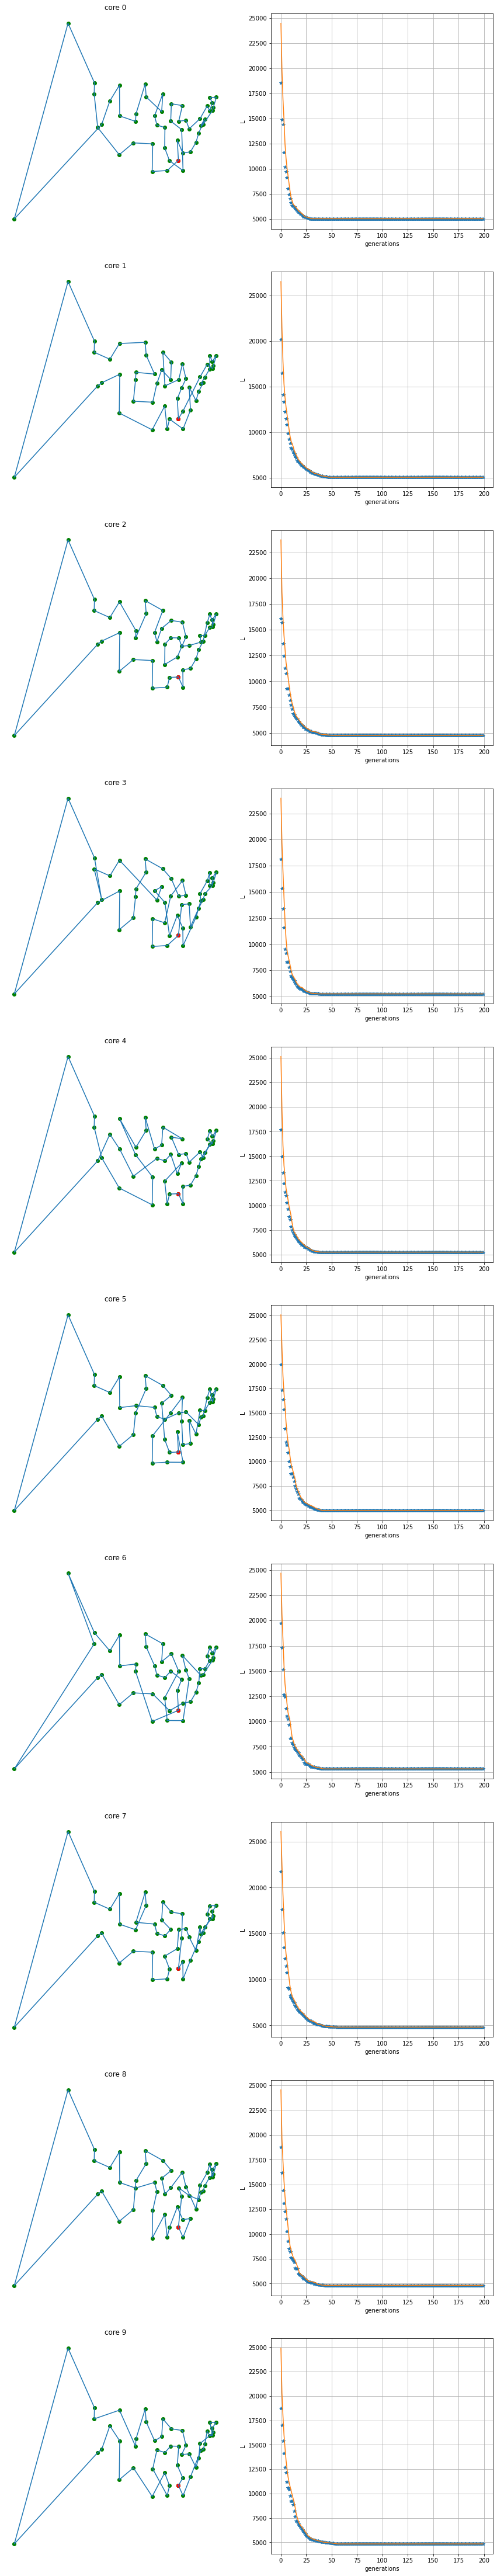

In [26]:
x_c = np.arange(200)
fig, axs = plt.subplots(10,2, figsize = (15,80) )

data_x = []
data_y = []
data_L = []
data_L_m = []
charge_data("deca_core",size, data_x,data_y, data_L, data_L_m)
for i in range(10):

    axs[i,0].plot(data_x[i][:,1],data_y[i][:,1], "o", color = "green")
    axs[i,0].plot(data_x[i][0,1],data_y[i][0,1], "o", color = "red")
    axs[i,0].plot(data_x[i][0:,-1],data_y[i][0:,-1])
    axs[i,0].set_title('core ' + str(i))
    axs[i,0].axis("off")
 
    axs[i,1].plot(x_c,data_L[i], "*")
    axs[i,1].plot(x_c,data_L_m[i])
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L")
    axs[i,1].grid(True)
    print( "core {}: best L^2 value: {}".format(i,data_L[i][-1]) )
 
plt.show()

It is clearly seen that our algorithm is not efficient enough to solve a TSP with 50 cities: each core gives a different solution and none seems to be a good solution.
We should let communicate the cores in order to see if we can get better results.

### 2. Simulation with 10 communicating cores

We added to the cpp source code the ability for each core to know the best result of the other 9 every 30 generations. Since the crossover algorithm is implemented using the selection algorithm ( as in exercise 9), this should favor matching the solutions of the other cores to get better results.

core 0: best L^2 value: 4623.65
core 1: best L^2 value: 4623.65
core 2: best L^2 value: 4623.65
core 3: best L^2 value: 4623.65
core 4: best L^2 value: 4623.65
core 5: best L^2 value: 4623.65
core 6: best L^2 value: 4623.65
core 7: best L^2 value: 4623.65
core 8: best L^2 value: 4623.65
core 9: best L^2 value: 4623.65


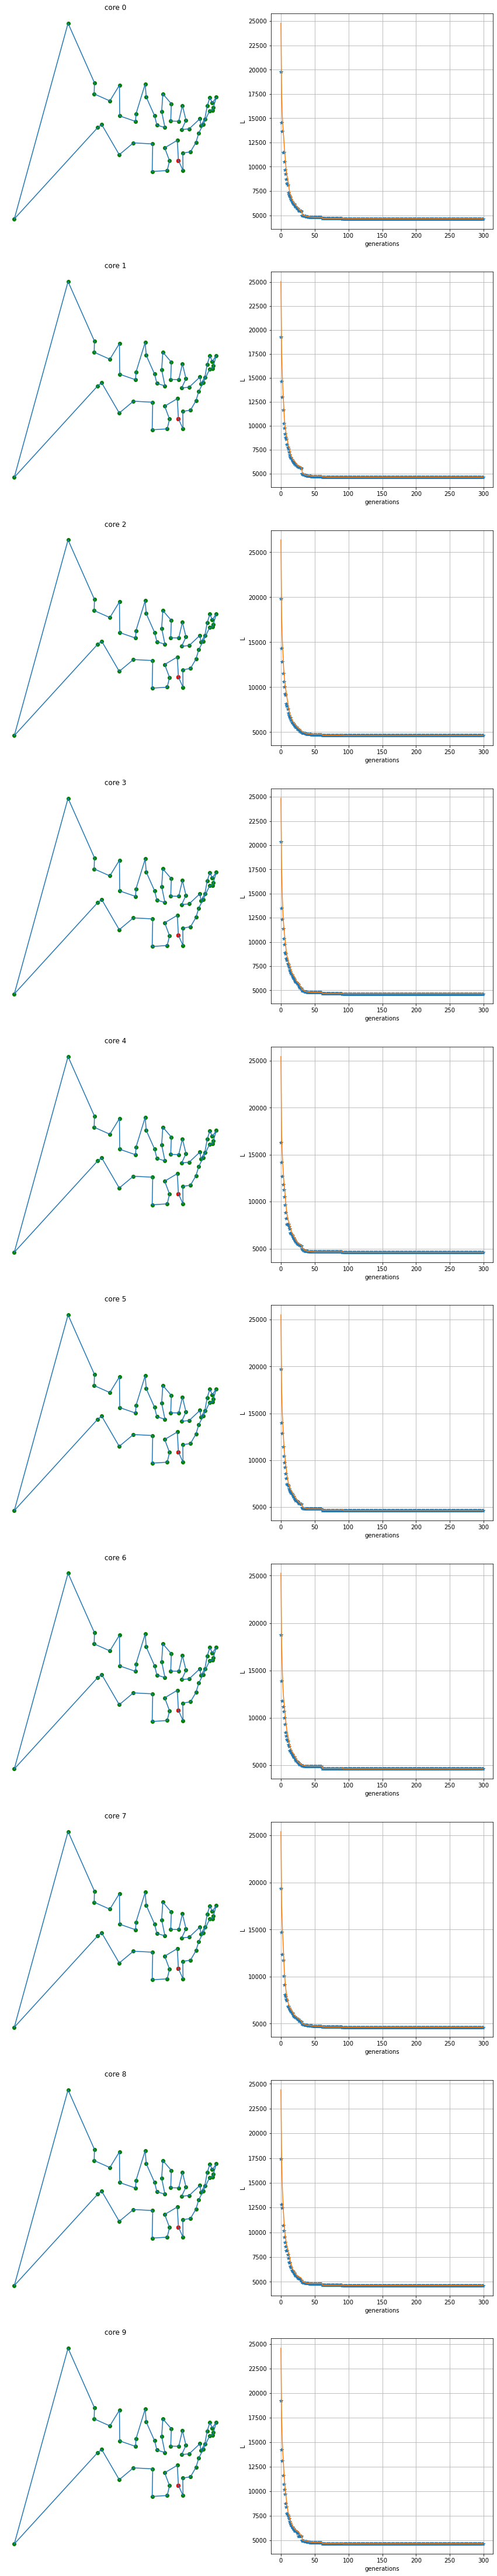

In [27]:
x_c = np.arange(300)
data_x = []
data_y = []
data_L = []
data_L_m = []
charge_data("best_deca",size, data_x,data_y, data_L, data_L_m)
fig, axs = plt.subplots(10,2, figsize = (15,80) )

for i in range(10):

    axs[i,0].plot(data_x[i][:,1],data_y[i][:,1], "o", color = "green")
    axs[i,0].plot(data_x[i][0,1],data_y[i][0,1], "o", color = "red")
    axs[i,0].plot(data_x[i][0:,-1],data_y[i][0:,-1])
    axs[i,0].set_title('core ' + str(i))
    axs[i,0].axis("off")
 
    axs[i,1].plot(x_c,data_L[i], "*")
    axs[i,1].plot(x_c,data_L_m[i])
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L")
    axs[i,1].grid(True) 
    print( "core {}: best L^2 value: {}".format(i,data_L[i][-1]) )
    
          
plt.show()

From the graphs above we can see that the results of communication between cores are optimal: the $L^2$ function has a lower value than the previous case with isolated cores and from the graphs the path found seems reasonably the best.

We finally present the final result with a bigger graph:

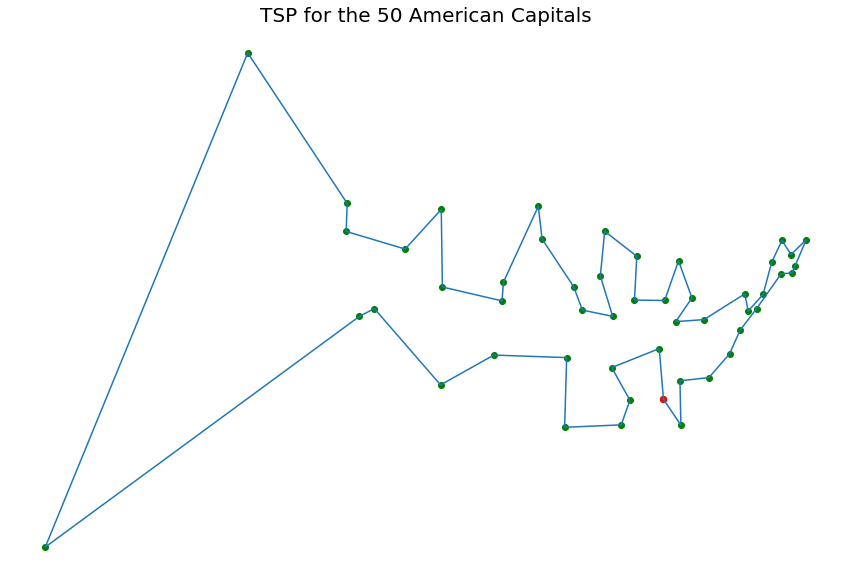

best L^2 value: 4623.65


In [28]:
fig = plt.figure(figsize = (15,10) )
plt.plot(data_x[0][:,1],data_y[0][:,1], "o", color = "green")
plt.plot(data_x[0][0,1],data_y[0][0,1], "o", color = "red")
plt.plot(data_x[0][0:,-1],data_y[0][0:,-1])
plt.title("TSP for the 50 American Capitals", fontsize = 20)
plt.axis("off")
plt.show()
print("best L^2 value: {}".format(data_L[i][-1]) )